# Проект: Линейные модели в машинном обучении

#### Описание проекта
К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить коров, чтобы расширить поголовье стада коров. Для этого он заключил контракт с ассоциацией пастбищ «ЭкоФерма».  
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже.    
Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

#### Цель проекта:

Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке.

#### Описание данных:  
  
Файл ferma_main.csv содержит данные о стаде фермера на текущий момент:  
  
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
    
Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера:  
  
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.  
  
Файл cow_buy.csv содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:  
  
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### План выполнения проекта:  
  
  1. Загрузка и изучение данных
  2. Предобработка данных
  3. Исследовательский анализ данных
  4. Корреляционный анализ
  5. Обучение модели линейной регрессии
  6. Обучение модели логистической регрессии
  7. Итоговые выводы

In [ ]:
!pip install phik
import phik
from phik import report, phik_matrix

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import spearmanr
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn. metrics import precision_recall_curve

## 1. Загрузка и изучение данных

In [ ]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [ ]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [ ]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [ ]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


**Вывод:**  
- В основном датафрейме 634 записи. Некоторые столбцы имеют неправильный тип данных  
- Датафрейм с именами быков содержит 629 записей, что может слидетельствовать о пропусках в основном датафрейме
- В данных о коровах для покупки 20 записей. Некоторые столбцы имеют неправильный тип данных
- Названия столбцов во всех датафреймах следует отредактировать

## 2. Предобработка данных

### Изменения названий столбцов

In [ ]:
ferma_main.columns = ['id', 'milk_yield', 'efu', 'crude_protein', 'spr', 'breed', 'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
ferma_dad.columns = ['id', 'dad_name']
cow_buy.columns = ['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content', 'protein', 'age']

print(f'{ferma_main.columns}, \n{ferma_dad.columns}, \n{cow_buy.columns}')

Index(['id', 'milk_yield', 'efu', 'crude_protein', 'spr', 'breed',
       'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk',
       'age'],
      dtype='object'), 
Index(['id', 'dad_name'], dtype='object'), 
Index(['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content',
       'protein', 'age'],
      dtype='object')


### Обработка пропусков

In [ ]:
ferma_main.isna().sum()

id               0
milk_yield       0
efu              0
crude_protein    0
spr              0
breed            0
type_pasture     0
dad_breed        0
fat_content      0
protein          0
taste_milk       0
age              0
dtype: int64

In [ ]:
ferma_dad.isna().sum()

id          0
dad_name    0
dtype: int64

In [ ]:
cow_buy.isna().sum()

breed           0
type_pasture    0
dad_breed       0
dad_name        0
fat_content     0
protein         0
age             0
dtype: int64

Пропусков не обнаружено

### Обработка неявных дубликатов

<center><h4>Основной датафрейм</h4></center>

In [ ]:
ferma_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
ferma_main['type_pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [ ]:
ferma_main.loc[ferma_main['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'
ferma_main['type_pasture'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [ ]:
ferma_main['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [ ]:
ferma_main.loc[ferma_main['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'
ferma_main['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

<center><h4>Датафрейм с быками</h4></center>

In [ ]:
ferma_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

<center><h4>Датафрейм с коровами для покупки</h4></center>

In [ ]:
cow_buy['type_pasture'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [ ]:
cow_buy['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
cow_buy['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

### Обработка значений

In [ ]:
# приведем все столбцы с текстовыми данными к нижнему регистру
ferma_main.loc[ferma_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'taste_milk']:
    ferma_main[columns] = ferma_main[columns].str.lower()

ferma_dad['dad_name'] = ferma_dad['dad_name'].str.lower()

cow_buy.loc[cow_buy['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'dad_name']:
    cow_buy[columns] = cow_buy[columns].str.lower()

### Обработка дубликатов

In [ ]:
ferma_main.duplicated().value_counts()

False    629
True       5
dtype: int64

In [ ]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().value_counts()

False    629
dtype: int64

In [ ]:
ferma_dad.duplicated().value_counts()

False    629
dtype: int64

In [ ]:
cow_buy.duplicated().value_counts()

False    16
True      4
dtype: int64

Этот датафрейм не имеет несколько столбцов как у основного, в полне вероятно, что коровы с одинаковыми показателями могут иметь различия именно по этим показателям, оставим датафрейм неизменным.

### Изменение типов данных

В пункте 1 изучив данные мы видим, что данные о жирности, протеине и коэфицентах ЭКЕ и СПО, в основном датафрейме, имеют некорректый тип данных "object", когда должны быть числом с запятой.

In [ ]:
ferma_main['fat_content'] = ferma_main['fat_content'].apply(lambda x: x.replace(',', '.'))
ferma_main['fat_content'] = ferma_main['fat_content'].astype(float)
ferma_main['protein'] = ferma_main['protein'].apply(lambda x: x.replace(',', '.'))
ferma_main['protein'] = ferma_main['protein'].astype(float)
ferma_main['efu'] = ferma_main['efu'].apply(lambda x: x.replace(',', '.'))
ferma_main['efu'] = ferma_main['efu'].astype(float)
ferma_main['spr'] = ferma_main['spr'].apply(lambda x: x.replace(',', '.'))
ferma_main['spr'] = ferma_main['spr'].astype(float)

In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   milk_yield     629 non-null    int64  
 2   efu            629 non-null    float64
 3   crude_protein  629 non-null    int64  
 4   spr            629 non-null    float64
 5   breed          629 non-null    object 
 6   type_pasture   629 non-null    object 
 7   dad_breed      629 non-null    object 
 8   fat_content    629 non-null    float64
 9   protein        629 non-null    float64
 10  taste_milk     629 non-null    object 
 11  age            629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


Аналогичная проблема присутствует и в датафрейме с корова к покупке.

In [ ]:
cow_buy['fat_content'] = cow_buy['fat_content'].apply(lambda x: x.replace(',', '.'))
cow_buy['fat_content'] = cow_buy['fat_content'].astype(float)
cow_buy['protein'] = cow_buy['protein'].apply(lambda x: x.replace(',', '.'))
cow_buy['protein'] = cow_buy['protein'].astype(float)

In [ ]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   type_pasture  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_content   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Вывод
- Названия столбцов датафреймов приведены к "змеиному регистру".  
- Пропусков не найдено;
- В ferma_main и ferma_dad были обнаружены полные и неявные дубликаты. Неявные дубликаты были исправлены;
- Типы данных в датафреймах приведены в соответствие.

## 3. Исследовательский анализ данных

In [ ]:
#напишем функцию простроения гистограммы и "ящика с усами" для количественных признаков
def hist_boxplot(df, column):
    sns.set(rc={"figure.figsize": (20, 5)})

    fig,axes=plt.subplots(1,2)

    sns.histplot(data=df[column], bins=20, ax=axes[0])

    axes[0].set(ylabel='Количество коров', xlabel=column)

    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=column)

    plt.show()

In [ ]:
#напишем функцию для построения круговых диаграмм для категориальных признаков
def pie_chart(df, column):

    value_counts = df[column].value_counts()

    plt.figure(figsize=(5, 5))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.show()
    return plt.show()

### Анализ основного датафрейма

<center><h4>Удой</h4></center>

In [ ]:
ferma_main['milk_yield'].describe().round(2)

count      629.00
mean      6188.75
std       1644.80
min       5204.00
25%       5751.00
50%       6133.00
75%       6501.00
max      45616.00
Name: milk_yield, dtype: float64

Наблюдаем наличие аномальных значений.

In [ ]:
ferma_main.sort_values(by='milk_yield', ascending=False).head()

,id,milk_yield,efu,crude_protein,spr,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,вис бик айдиал,холмистое,айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,вис бик айдиал,холмистое,айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.072,вкусно,более_2_лет
294,295,7197,15.6,2241,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.075,вкусно,более_2_лет


Мы видим единственное аномальное значение удоя. Удалим соответствующую ему строку.

In [ ]:
ferma_main = ferma_main[ferma_main['milk_yield'] < 8000]

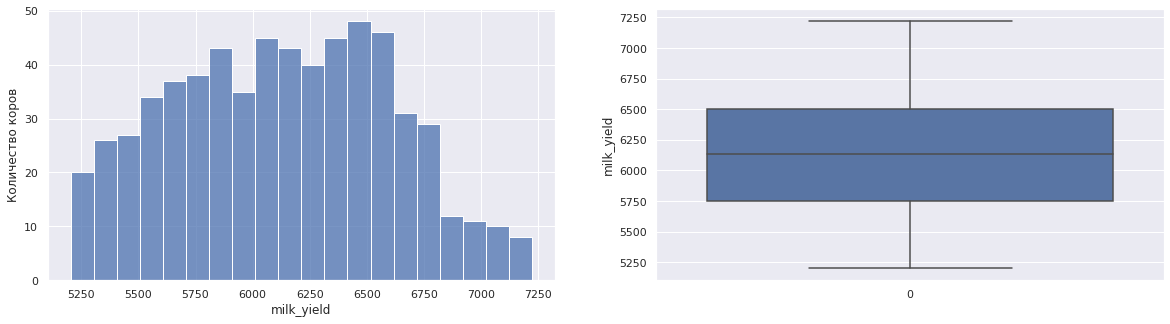

In [ ]:
hist_boxplot(ferma_main, 'milk_yield')

Удои распределены нормально. Медианный удой 6132.5 кг в год.

<center><h4>Питательность корма (ЭКЕ)</h4></center>

In [ ]:
ferma_main['efu'].describe().round(2)

count    628.00
mean      14.55
std        1.30
min       10.90
25%       13.50
50%       14.70
75%       15.60
max       16.80
Name: efu, dtype: float64

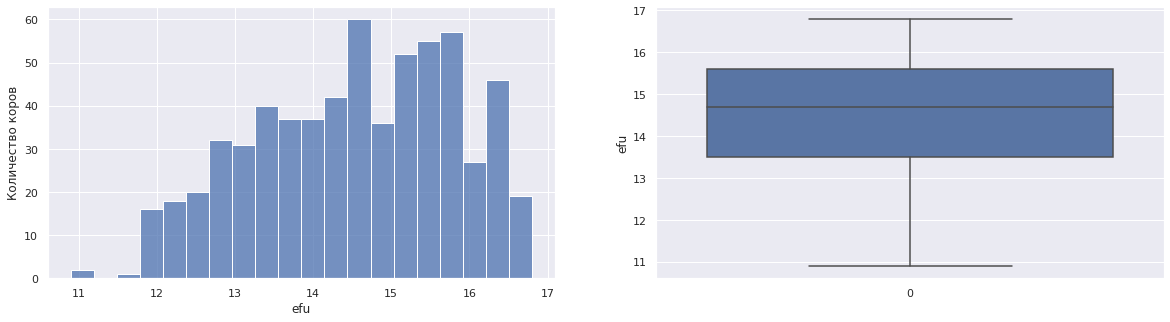

In [ ]:
hist_boxplot(ferma_main, 'efu')

График ЭКЕ смещен в право, медианное значение 14.7

<center><h4>Сырой протеин</h4></center>

In [ ]:
ferma_main['crude_protein'].describe().round(2)

count     628.00
mean     1923.76
std       182.83
min      1660.00
25%      1771.75
50%      1888.00
75%      2062.25
max      2349.00
Name: crude_protein, dtype: float64

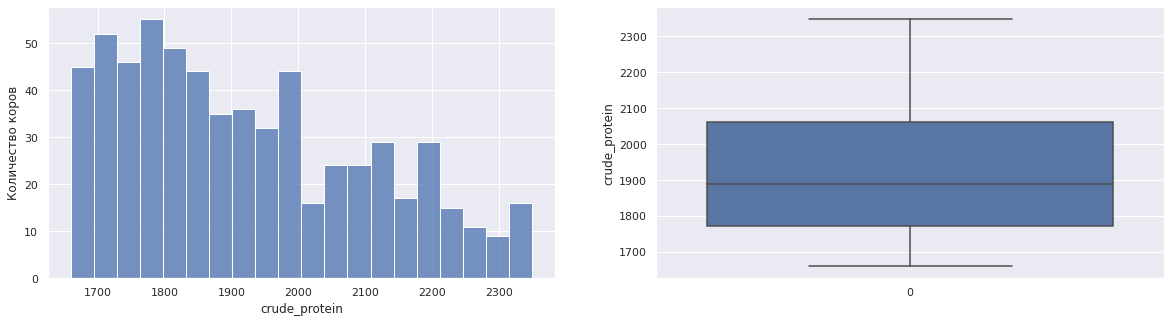

In [ ]:
hist_boxplot(ferma_main, 'crude_protein')

График сырого протеина в коре коров смещен влево, медианное значение 1888

<center><h4>Сахаро-протеиновое соотношение (СПО)</h4></center>

In [ ]:
ferma_main['spr'].describe().round(2)

count    628.00
mean       0.91
std        0.03
min        0.84
25%        0.89
50%        0.93
75%        0.94
max        0.96
Name: spr, dtype: float64

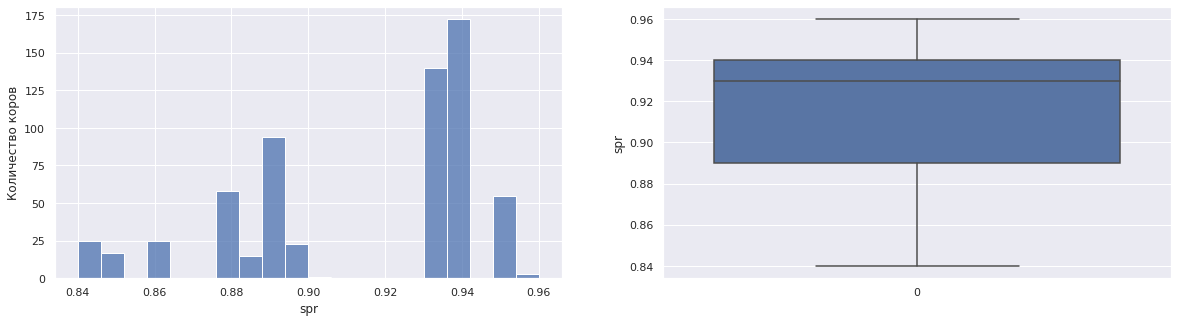

In [ ]:
hist_boxplot(ferma_main, 'spr')

СПО распределенно довольно неравномерно на 2 части с высоким соотншением больше 0.92 и низким меньше этого значения. Медианное значение при этом 0.93

<center><h4>Жирность молока</h4></center>

In [ ]:
ferma_main['fat_content'].describe().round(2)

count    628.00
mean       3.60
std        0.17
min        2.99
25%        3.59
50%        3.65
75%        3.72
max        3.75
Name: fat_content, dtype: float64

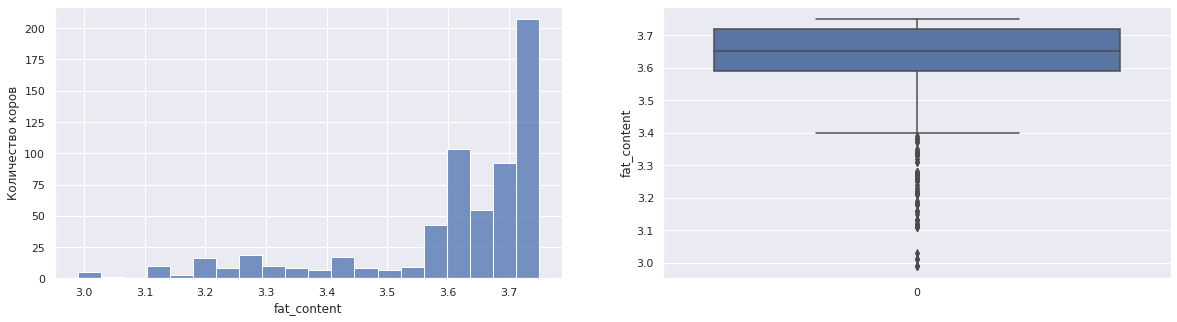

In [ ]:
hist_boxplot(ferma_main, 'fat_content')

График жирности сильно смещен вправо, что говорит о высокой жирности молока. Медианное значение при этом 3.65%. Имеются выбросы слева.


<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Данные реалистичны, но распределение ненормальное.

<center><h4>Содержание белка в молоке</h4></center>

In [ ]:
ferma_main['protein'].describe().round(3)

count    628.000
mean       3.076
std        0.003
min        3.069
25%        3.074
50%        3.076
75%        3.077
max        3.085
Name: protein, dtype: float64

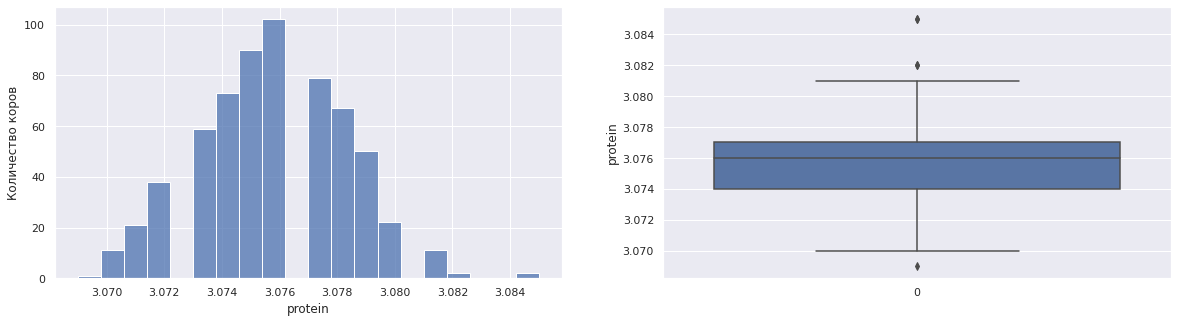

In [ ]:
hist_boxplot(ferma_main, 'protein')

Содержание белка в молоке распределено нормально, медианное значение 3.076

<center><h4>Породы коров</h4></center>

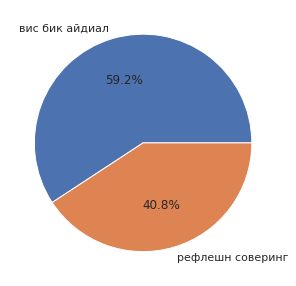

In [ ]:
pie_chart(ferma_main, 'breed')

Порода вис бик айдиал преобладает в хозяйстве

<center><h4>Тип пастбища</h4></center>

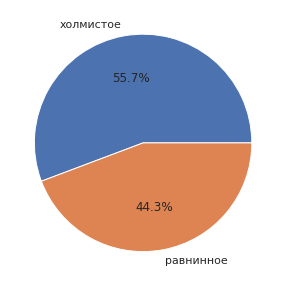

In [ ]:
pie_chart(ferma_main, 'type_pasture')

Холмистые пастбища преобладают в хозяйстве

<center><h4>Породы отцов</h4></center>

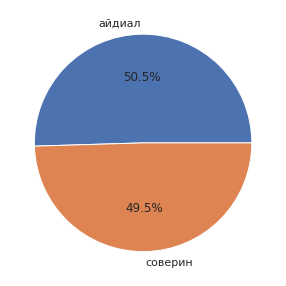

In [ ]:
pie_chart(ferma_main, 'dad_breed')

Породы отцов распределены в равных долях

<center><h4>Вкус молока</h4></center>

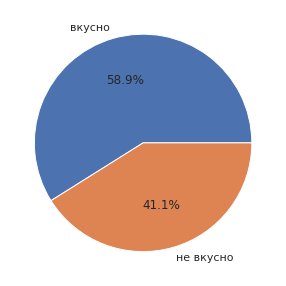

In [ ]:
pie_chart(ferma_main, 'taste_milk')

Молоко с оценкой "вкусно" преобладет, хоть и не колоссально.

<center><h4>Возраст коров</h4></center>

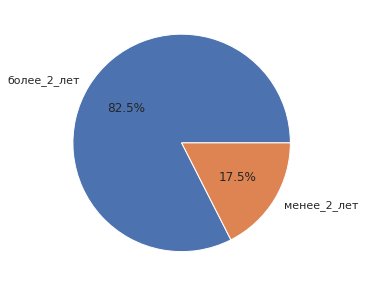

In [ ]:
pie_chart(ferma_main, 'age')

Коров старше 2 лет подавляющее большинство

### Анализ датафрейма быков

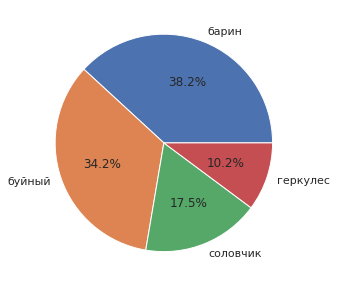

In [ ]:
pie_chart(ferma_dad, 'dad_name')

Наиболее плодовитыми являются быки по кличке Буйный и Барин с приблизительно равными долями

### Анализ датафрейма коров к покупке

<center><h4>Жирность молока</h4></center>

In [ ]:
cow_buy['fat_content'].describe().round(2)

count    20.00
mean      3.58
std       0.13
min       3.34
25%       3.51
50%       3.59
75%       3.65
max       3.77
Name: fat_content, dtype: float64

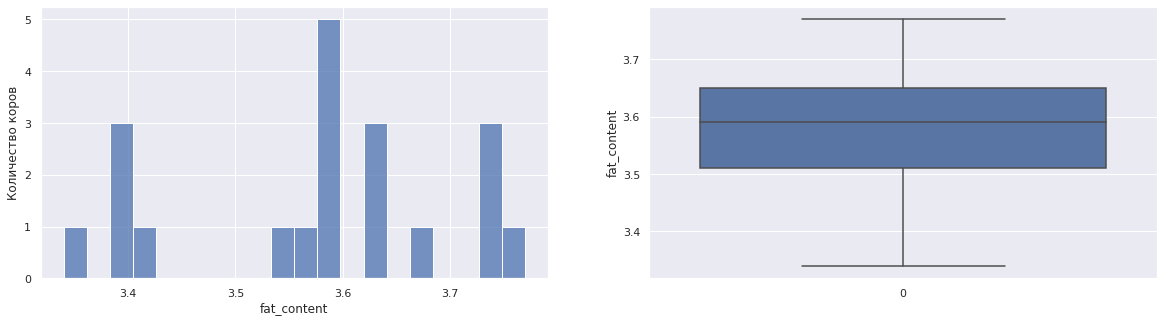

In [ ]:
hist_boxplot(cow_buy, 'fat_content')

Видим схожую ситуацию с коровами в хозяйстве

<center><h4>Содержание белка в молоке</h4></center>

In [ ]:
cow_buy['protein'].describe().round(3)

count    20.000
mean      3.070
std       0.010
min       3.046
25%       3.064
50%       3.074
75%       3.076
max       3.081
Name: protein, dtype: float64

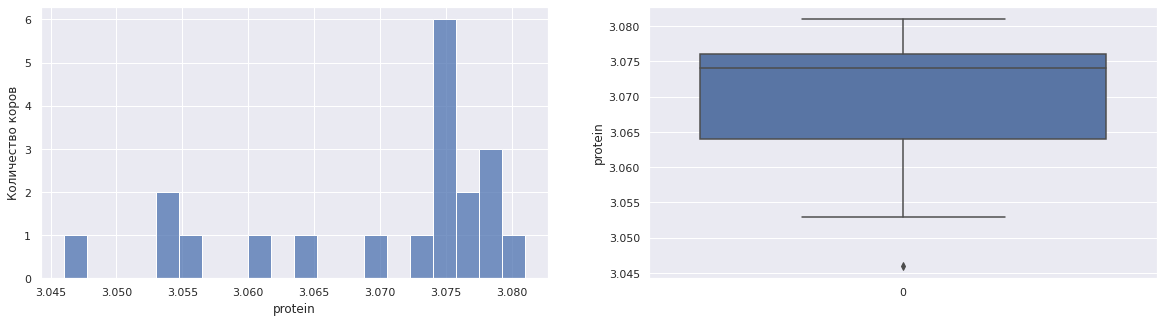

In [ ]:
hist_boxplot(cow_buy, 'protein')

Здесь наблюдаем смещение вправо, что говорит о преобладании среднего белка в молоке у коров для покупки.

<center><h4>Породы коров</h4></center>

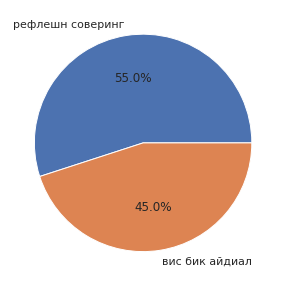

In [ ]:
pie_chart(cow_buy, 'breed')

Порода рефлешн соверинг преобладает

<center><h4>Тип пастбища</h4></center>

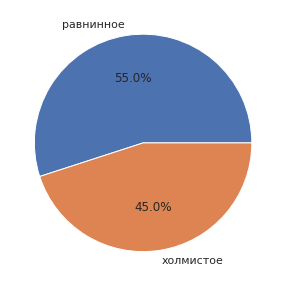

In [ ]:
pie_chart(cow_buy, 'type_pasture')

Здесь же наоборот преобладают равнинные пастбища

<center><h4>Породы быков пап</h4></center>

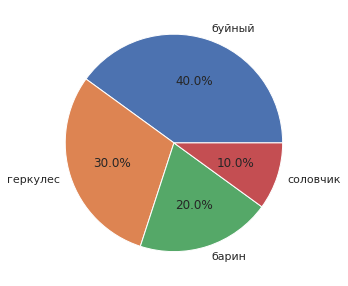

In [ ]:
pie_chart(cow_buy, 'dad_name')

В этом датафрейме ситуция иная: Буйный и Геркулес занимают большую долю

<center><h4>Возраст коров</h4></center>

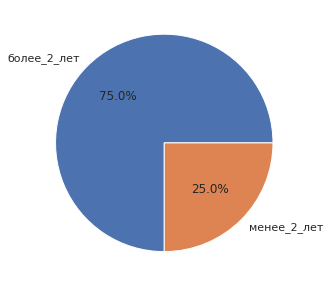

In [ ]:
pie_chart(cow_buy, 'age')

Здесь так же подавляющее большинство коров старше 2 лет

### Вывод  
  
**Данные основного датафрейма показывают следующее:**  
  - Имелся выброс с аномально высоким значением. Удалили строку с этим выбросом. Удои распределены нормально. Медианный удой 6132.5 кг в год.
  - График ЭКЕ смещен в право, медианное значение 14.7.
  - СПО распределенно довольно неравномерно на 2 части с высоким соотношением больше 0.92 и низким меньше этого значения. Медианное значение при этом 0.93
  - График жирности сильно смещен вправо, что говорит о высокой жирности молока. Медианное значение при этом 3.65%. Имеются выбросы слева.
  - Содержание белка в молоке распределено нормально, медианное значение 3.076.
  - Порода вис бик айдиал преобладает в хозяйстве.
  - Холмистые пастбища преобладают в хозяйстве.
  - Породы отцов распределены в равных долях.
  - Молоко с оценкой "вкусно" преобладет (58,9%), хоть и не колоссально.
  - Коров старше 2 лет подавляющее большинство.  
  
Резюмируя можем сказать, что в хозяйстве преобладают коровы старше 2 лет, дающие зачастую вкусное молоко с высокой жирностью и неплохим содержанием белка, около 6000 кг в год.  
  
**Данные датафрейма быков пап показали следующее:**  
  
Наиболее плодовитыми являются быки по кличке Буйный и Барин с приблизительно равными долями, в 34.2% и 38.2%.  
  
**Данные датафрейма коров к покупке показывают:**  
  - Видим схожую ситуацию с коровами в хозяйстве с медианной жирностью 3.59%
  - Наблюдаем смещение графика вправо, что говорит о преобладании среднего белка в молоке у коров для покупки. Медианное значение при этом схожее 3.074.
  - Породы коров к покупке как и типы пастбищ, здесь имеют противоположные доли нежели в хозяйстве.
  - Так же и с продами пап быков иная ситуация: Буйный и Геркулес занимают большую долю.
  - С возрастом коров, ситуация аналогична той, что в хозяйстве.  
  
Резюмируя можем отметить, что среди коров к покупке так же большинство старше 2 лет, имеют схожие показатели по жирности и содержанию белка, но при этом чаще пасутся они на равнинах и преобладающая порода здесь рефлешн соверинг.

## 4. Корреляционный анализ

### Расчет коэффициентов корреляции между всеми признаками.

Теперь построим тепловую карту корреляции Фи для всех признаков в целом.

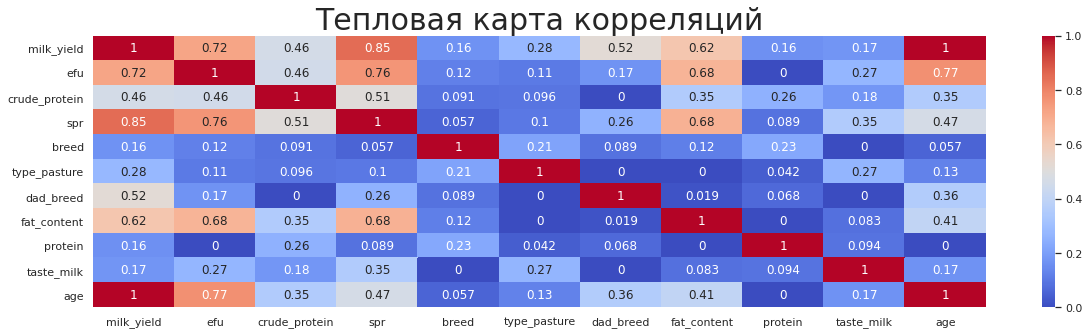

In [ ]:
plt.figure(figsize=(20, 5))

sns.heatmap(ferma_main[['milk_yield', 'efu', 'crude_protein', 'spr', 'breed', 'type_pasture',
                        'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
                      ].phik_matrix(interval_cols = ['milk_yield', 'efu', 'crude_protein', 'spr', 'fat_content', 'protein'],
                                    bins = {'milk_yield':10,
                                            'efu':10,
                                            'crude_protein':10,
                                            'spr':5,
                                            'fat_content':5,
                                            'protein':5}) ,
            annot=True,
            cmap='coolwarm')

plt.title('Тепловая карта корреляций', fontsize=30)
plt.show()

Из полученных данных наблюдаем:
- Сильнейшей 100% зависимостью обладает удой и возраст коров.
- Сильной зависимостью обладают показатели удоя с ЭКЕ, СПО и ЭКЕ с СПО (лучше питание - лучшие удой и СПО, а соответственно и выше соотношение сахаров к протеинам). Так же на высоком уровне прослеживается зависимость ЭКЕ от возраста.
- Зависимостью выше средней обладают показатели удоя, ЭКЕ и СПО по отношению к жирности молока.  
- На среднем уровне коррелирует показатель сырого белка в корме удоем, ЭКЕ и СПО.  
- Так же к среднему уровню можно отнести корреляцию между удоем и породой пап быков, возраста с ЭКЕ и СПО.
- Жирность имеет зависимость ниже средней с возрачтом.
- Так же вкус молока имеет невысокую зависимость от ЭКЕ, типа пастбища (то что ест животное может влиять на вкус молока) и СПО, имеющее коррецицию даже чуть выше чем первые два признака (логично что состав молока так же может оказывать влияние на его вкус)
- В остальных показателях прослеживается очень низкая зависимость, либо полное ее отсутствие.

### Построение диаграмм рассеяния для признака Удой.

Из данных полученых с помощью тепловой диаграммы выше и имеющихся данных из датафрейма коров к покупке в первую очередь стоит расчитать зависимости между удоем и всеми количественными признаками с учетом факторов возраста, породы отца, как обладающими самой высокой корреляцией с целевым признаком. Так же не стоит упускать фактор типа пастбища, который так же влияет на удой хоть и в не большой степени.

In [ ]:
#напишем функцию для построения диаграмм рассеяния
def scattering(factor):
    position = 0
    plt.figure(figsize=[25,30])
    plt.subplots_adjust(wspace=0.5, hspace=0.3)

    for name in ['efu', 'crude_protein', 'spr', 'fat_content', 'protein']:
        position += 1
        plt.subplot(3, 2, position)
        plt.title(f'Зависимость между удоем и {name}', fontsize=20)
        sns.scatterplot(data=ferma_main,
                        x=name,
                        y='milk_yield',
                        hue=factor,
                        palette={cat: 'red' if i == 0 else 'blue'
                                   for i, cat in enumerate(ferma_main[factor].unique())} #задаем определенный цвет точек
                       )
        plt.xlabel(name, fontsize=20)
        plt.ylabel('milk_yield', fontsize=20)
        plt.legend(fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid(True)

<center><h4>Фактор возраста</h4></center>

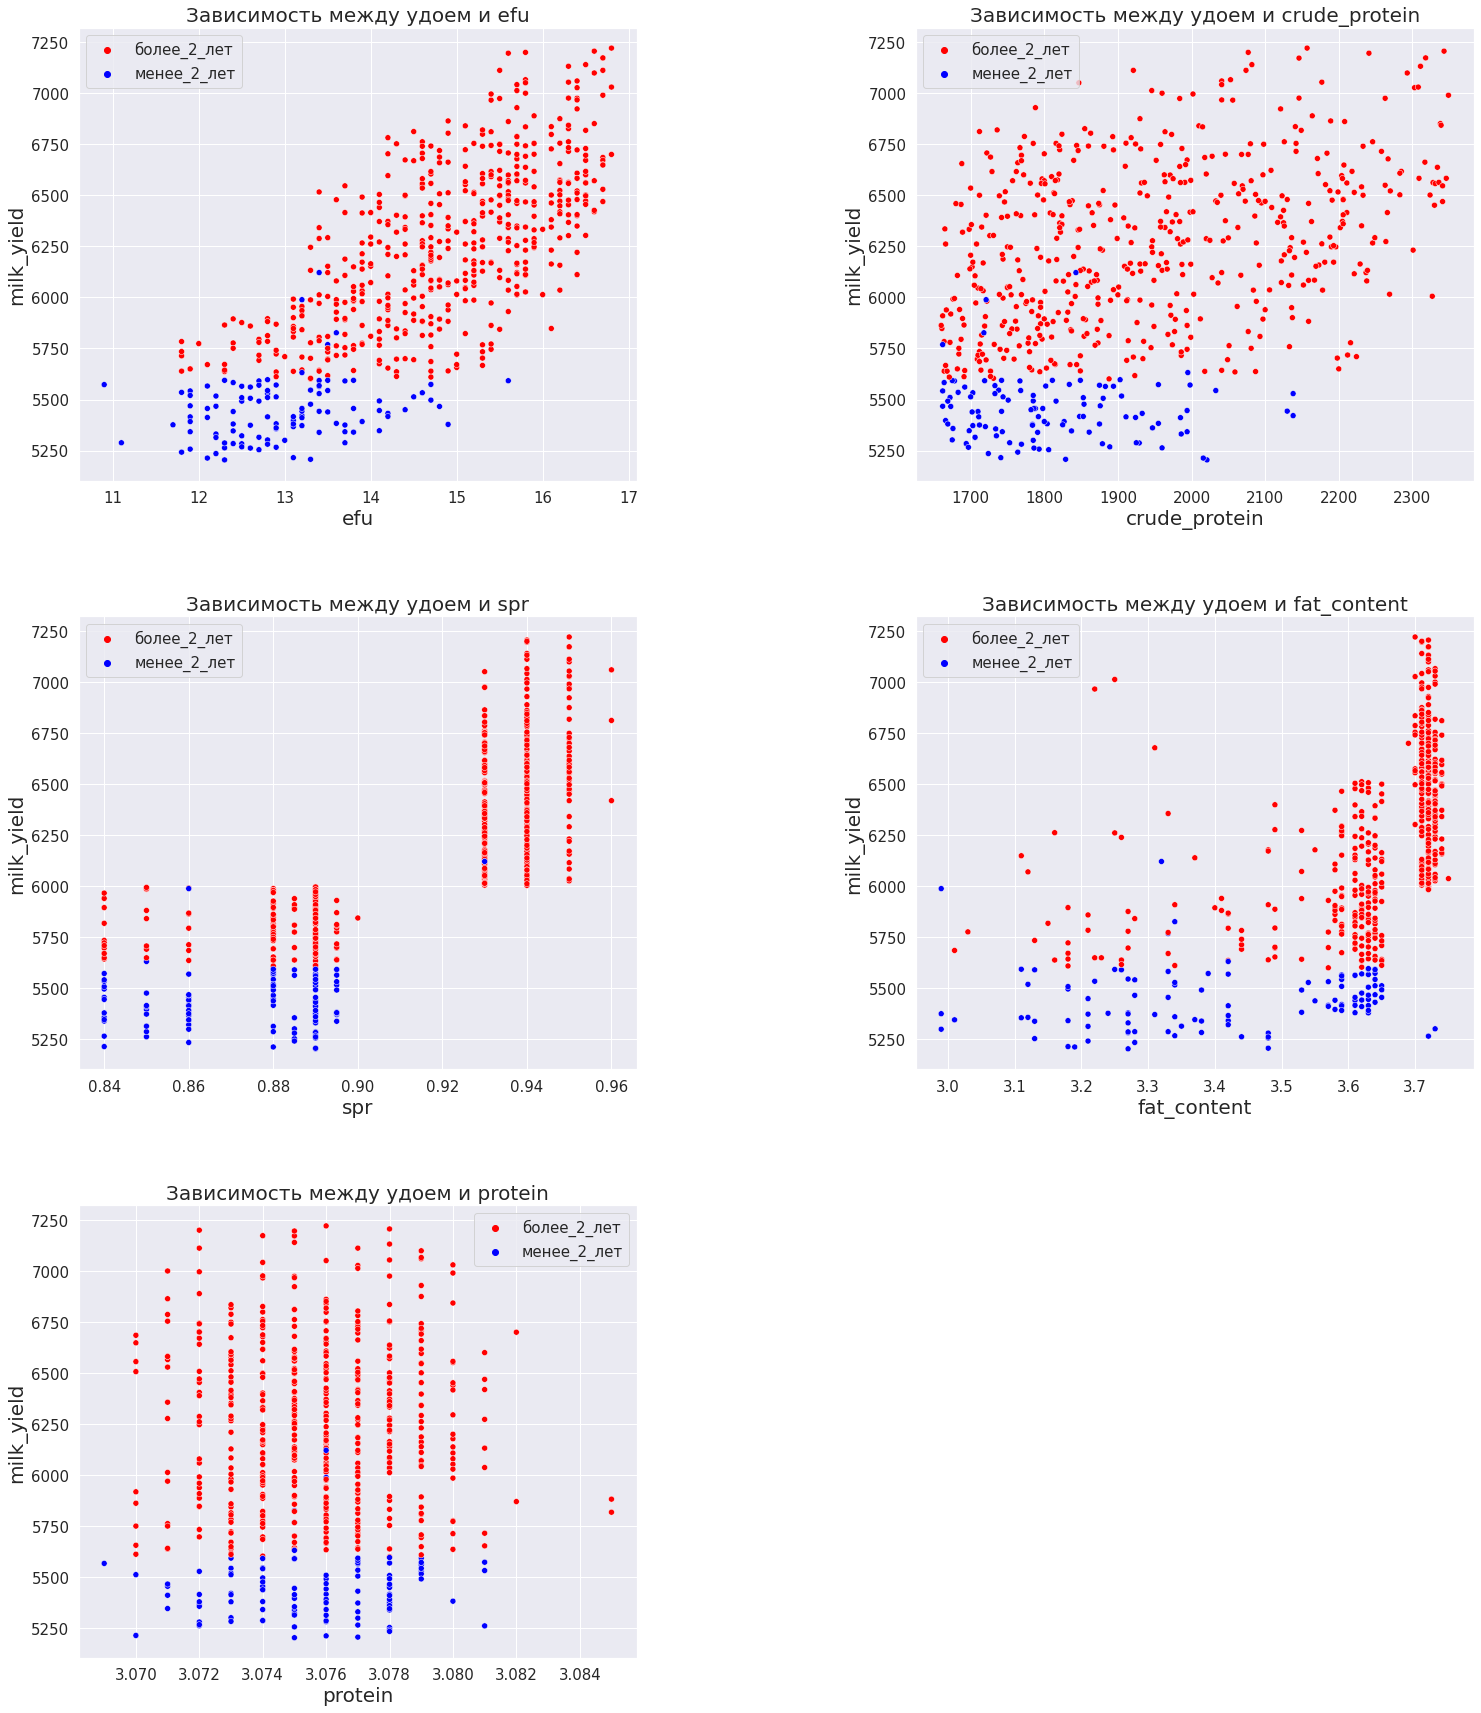

In [ ]:
scattering('age')

Как видим, диаграммы лишь подтверждают прямую зависимость удоя с возрастом.
  
Так же обратим внимание:  
- ЭКЕ обладает нелинейной зависимостью с удоем, так как линия вокруг которой собраны точки кривая. Для усиления степени связи ЭКЕ придется возвести в квадрат.
- У коров младше 2 лет практически не бывает высокого СПО.  
- СПО при удоях менее 6000 ниже 0.91, значит можно разбить этот признак на категориальный: "менее 0.91" и "более 0.91".  
- Жирность у большинства высокопроизводительных коров более 3.65 %.

<center><h4>Фактор породы отца</h4></center>

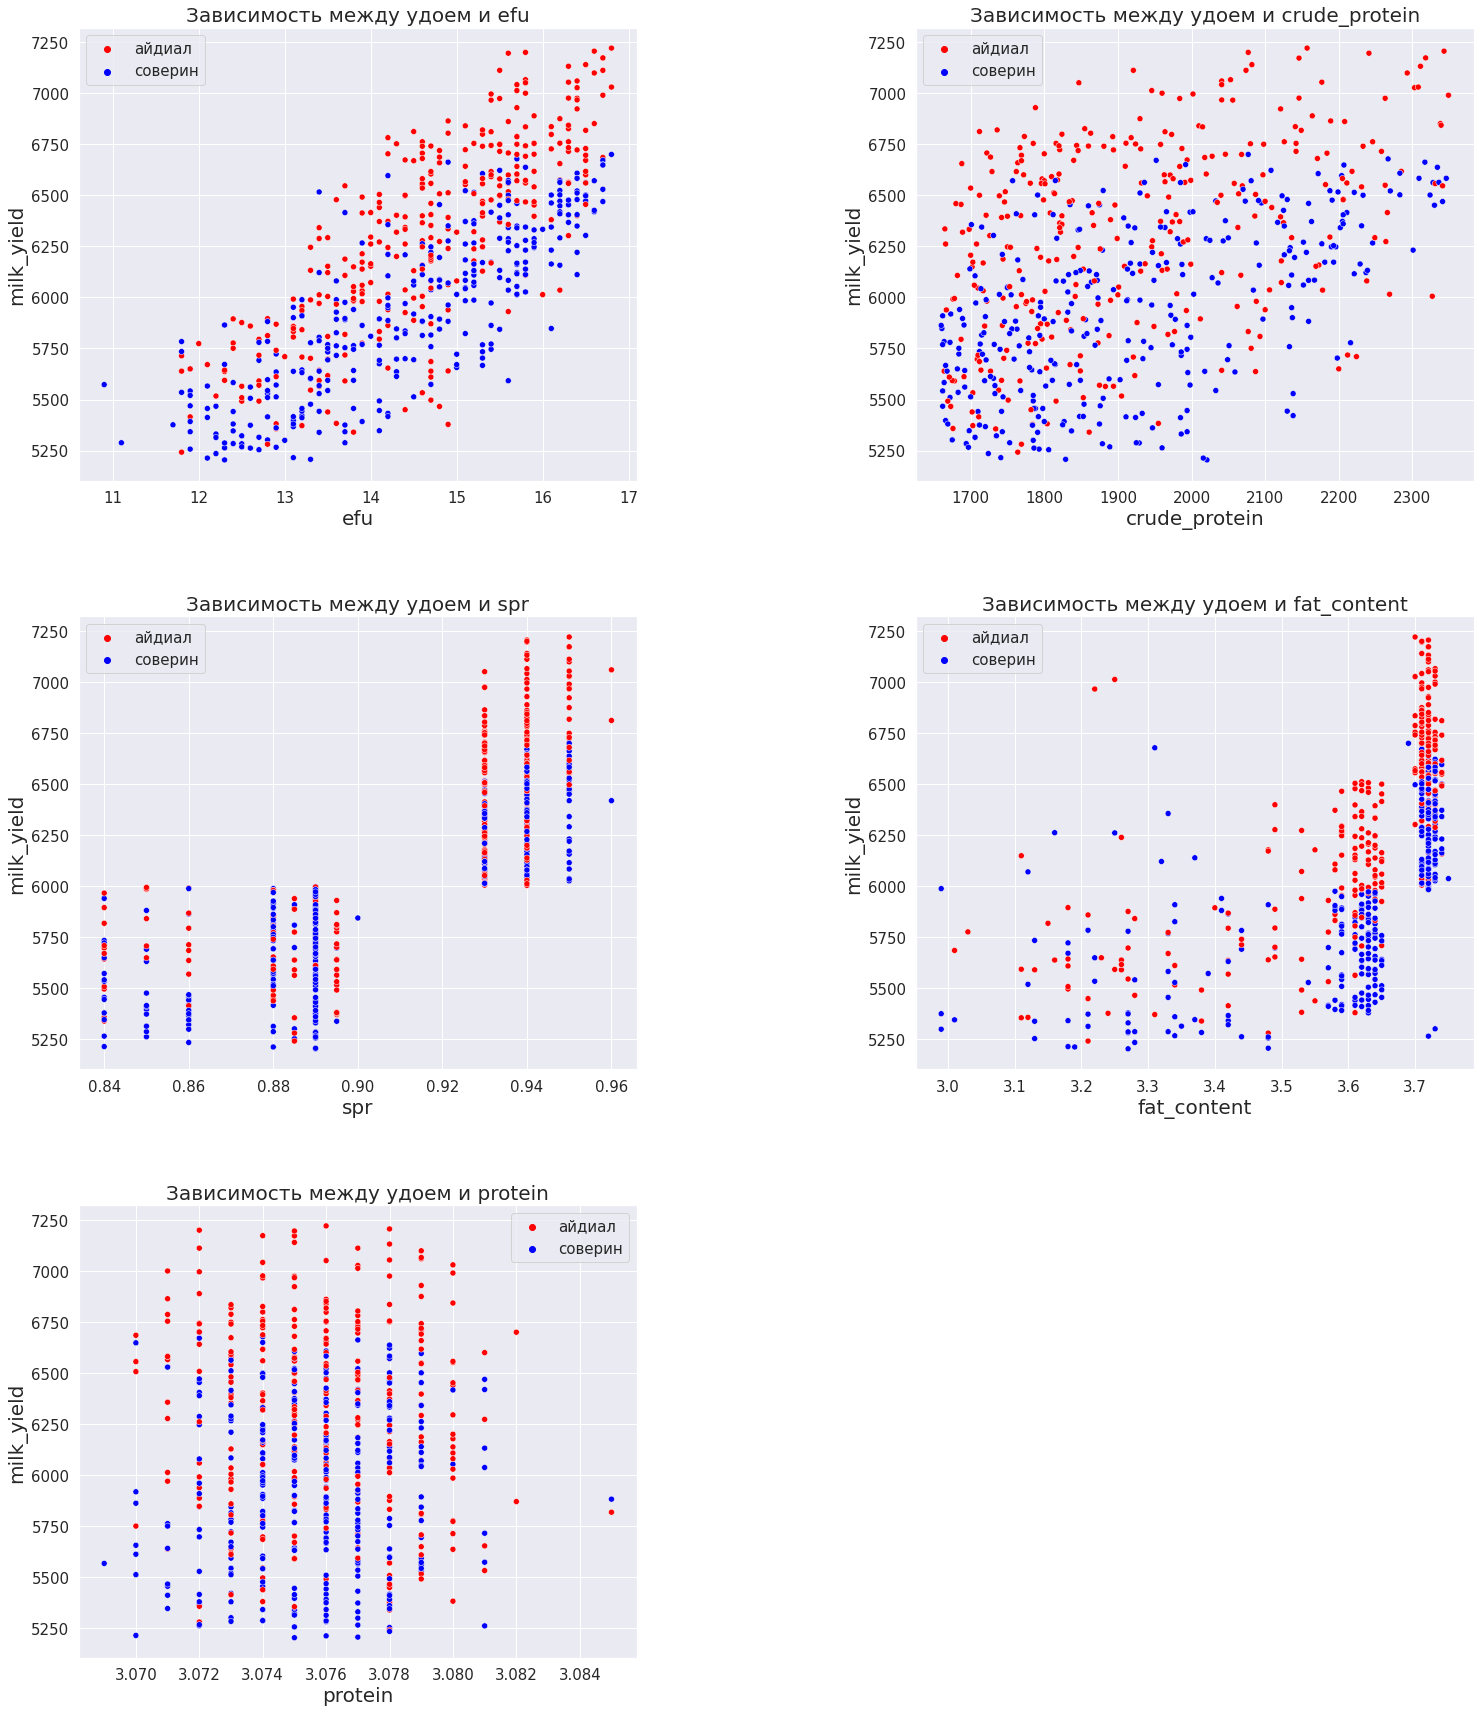

In [ ]:
scattering('dad_breed')

Здесь можем заметить, что порода отца несильно, но все же влияет на удой, и порода айдиал имеет небольшое преимущество. При этом результат тепловой диаграммы показывает, что порода самой коровы практически не влияет на удой.

<center><h4>Фактор типа пастбища</h4></center>

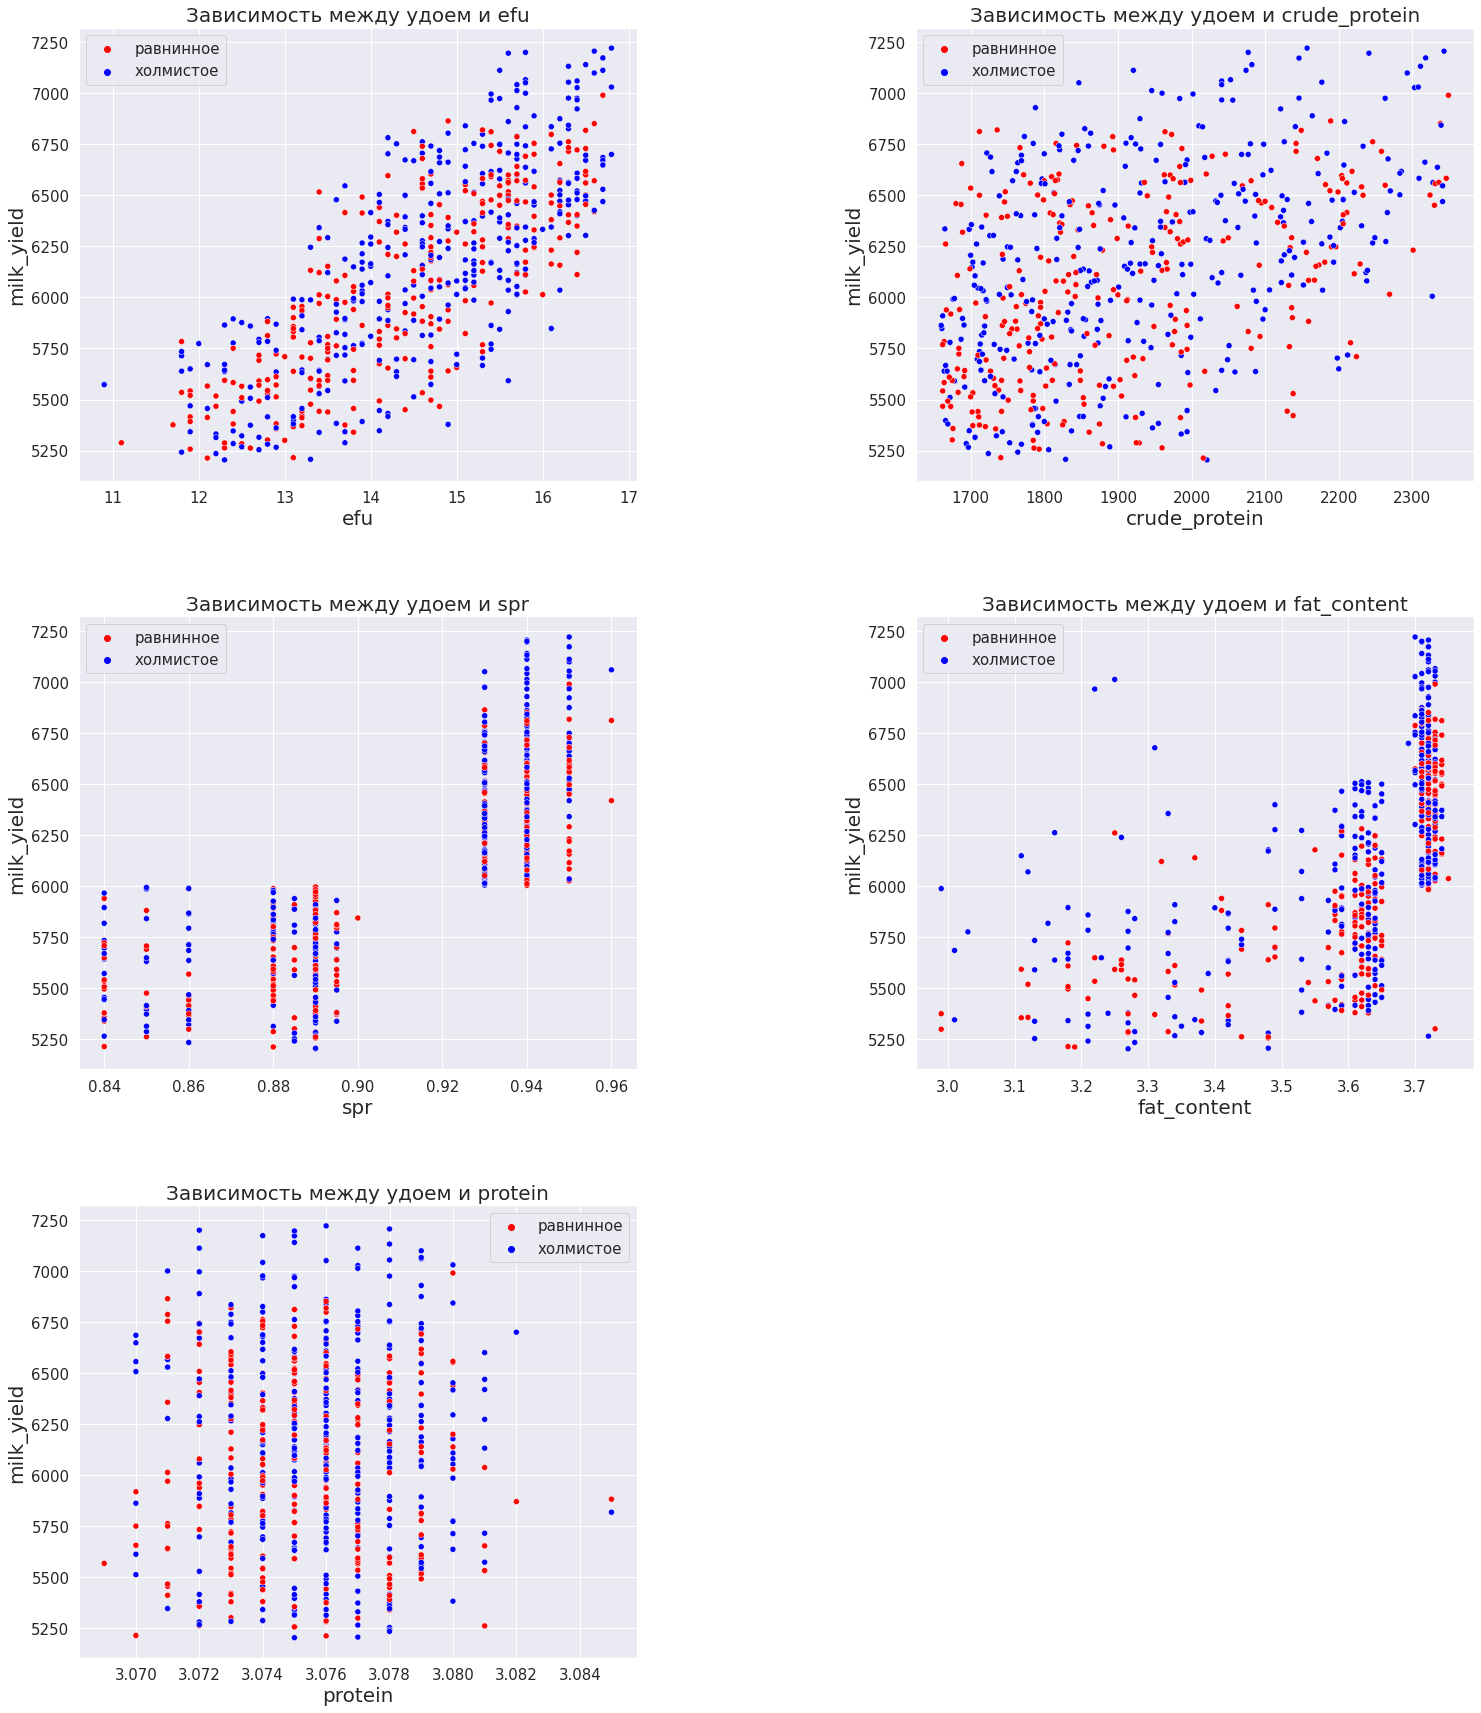

In [ ]:
scattering('type_pasture')

Сильной зависимости между удоями пастбищами не наблюдается, но можно отметить, что при всех исследуемых признаках, немногие наивысшие значения удоя, более 7000 кг в год, наблюдаются лишь на холмистых пастбищах.

### Вывод  
  
- ЭКЕ обладает нелинейной зависимостью с удоем, так как линия вокруг которой собраны точки кривая. Для усиления степени связи ЭКЕ придется возвести в квадрат.
- У коров младше 2 лет практически не бывает высокого СПО.  
- СПО при удоях менее 6000 ниже 0.91, значит можно разбить этот признак на категориальный: "менее 0.91" и "более 0.91".  
- Жирность у высокопроизводительных коров (свыше 6000 кг в год) более 3.6 %.
- Коровы порода отца у которых айдиал, чаще имеют болшие показатели удоя.
- Немногие самые высокие показатели удоя (свыше 7000 кг в год) приходят с холмистых пастбищ.
- Линейной зависимости между показателем содержания белка и годового удоя нет.

## 5. Обучение модели линейной регрессии

In [ ]:
#функция для масштабирования и кодировки данных
def model(df, cat_col_names, num_col_names):

    RANDOM_STATE = 42
    # сохранение входных признаков в переменную X
    X = df.drop('milk_yield', axis = 1)

    # сохранение целевого признака в переменную y
    y = df['milk_yield']
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

    # создадание переменной с экземпляром класса StandardScaler()
    scaler = StandardScaler()

    # обучение и трансформация количественных признаков из тренировочной выборки
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])

    # выполнение преобразования количественных признаков в тестовой выборке
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # создадие переменной с экземпляром класса OneHotEncoder()
    encoder = OneHotEncoder(drop = 'first', sparse=False)

    # обучение и трансформация категориальных признаков из тренировочной выборки
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

    # выполнение преобразования категориальных признаков в тестовой выборке
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    # получение от кодировщика списока новых столбцов и сохранение в новой переменной
    encoder_col_names = encoder.get_feature_names()

    # создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # объединение всех преобразованных данных в тренировочный и тестовый датафреймы
    # сбрасывние индексов в датафрейме с числовыми индексами, чтобы избежать ошибок

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'encoder': encoder,
        'encoder_col_names': encoder_col_names
    }


In [ ]:
#подсчеты для проверки качества модели
def model_quality_assessments(y_test, predictions):
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'R2 = {r2:.4f}')
    print(f'RMSE = {rmse:.2f}')
    print(f'MSE = {mse:.2f}')
    print(f'MAE = {mae:.2f}')

In [ ]:
#распределение остатков
def residue_analysis(y_test, predictions):

    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins = 20, color='blue', edgecolor='blue')
    axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    axes[0].set_title('Распределение остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals, color='blue')
    axes[1].set_xlabel('Предсказания')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

### Первая модель

In [ ]:
#first_model = model(ferma_main,
#                    ['breed', 'type_pasture', 'dad_breed', 'taste_milk', 'age'],
#                    ['efu', 'crude_protein', 'protein', 'spr', 'fat_content'])

first_model = model(ferma_main,
                    ['breed', 'type_pasture', 'dad_breed', 'age'],
                    ['efu', 'crude_protein', 'spr'])

Обучим первую модель на всех имеющихся признаках и получим предсказания на тестовой выборке.

In [ ]:
first_model_lr=LinearRegression()
first_model_lr.fit(first_model['X_train'], first_model['y_train'])
predictions_one = first_model_lr.predict(first_model['X_test'])

Проанализируем остатки

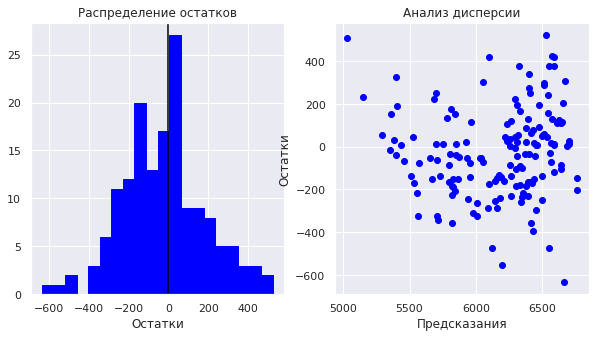

In [ ]:
residue_analysis(first_model['y_test'], predictions_one)

Оценим качество модели, расчитав метрики

In [ ]:
model_quality_assessments(first_model['y_test'], predictions_one)

R2 = 0.7844
RMSE = 209.49
MSE = 43887.02
MAE = 164.24


**Распределение остатков**  
Распределение остатков не нормальное, график не симметричен относительно нуля, смещен влево. Большая часть ошибок находится на интервале (-200; 200). Модель как завышает, так и занижает предсказания. Но чаще занижает на 150-200 кг.  
  
**Анализ дисперсии**  
На диаграмме рассеяния видим нестабильную дисперсию между значениями, и что она увеличивается по мере роста предсказаний.  
  
**Анализ метрик**  
Коэфициент детерминации R² говорит о том, что с точностью 78.44%  случаев предсказание модели ближе к истине, чем среднее значение целевого признака.  
  Так как диаграмма дисперсии демонстрирует большой разброс ошибок и наличие выбросов, нам подойдет метрика наимение восприимчивая этому. Таковой является RMSE, который говорит, что при прогнозе годового удоя в среднем модель ошибается примерно на 209 кг.

### Вторая модель

Для обучения второй модели изменим признаки ЭКЕ на ЭКЕ², количественные СПО и жирность на категорианальные, согласно выводам после корреляционного анализа.

In [ ]:
modified_ferma_main = ferma_main.copy()
modified_ferma_main['efu_sqr'] = modified_ferma_main['efu'] ** 2
modified_ferma_main['spr_cat'] = modified_ferma_main['spr'].apply(lambda x: '> 0.91' if x >= 0.91 else '< 0.91')
modified_ferma_main.head(10)

,id,milk_yield,efu,crude_protein,spr,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age,efu_sqr,spr_cat
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,201.64,< 0.91
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,163.84,< 0.91
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,196.00,< 0.91
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,< 0.91
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,163.84,< 0.91
5,6,5254,12.7,1806,0.885,рефлешн соверинг,холмистое,соверин,3.13,3.078,вкусно,менее_2_лет,161.29,< 0.91
6,7,5910,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,вкусно,более_2_лет,174.24,< 0.91
7,8,6179,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,вкусно,более_2_лет,216.09,> 0.91
8,9,6783,14.2,1918,0.940,рефлешн соверинг,холмистое,айдиал,3.71,3.077,вкусно,более_2_лет,201.64,> 0.91
9,10,5339,13.4,1791,0.895,вис бик айдиал,холмистое,соверин,3.13,3.075,вкусно,менее_2_лет,179.56,< 0.91


Изучим корреляции с новыми признаками, чтобы определить наиболее подходящие.

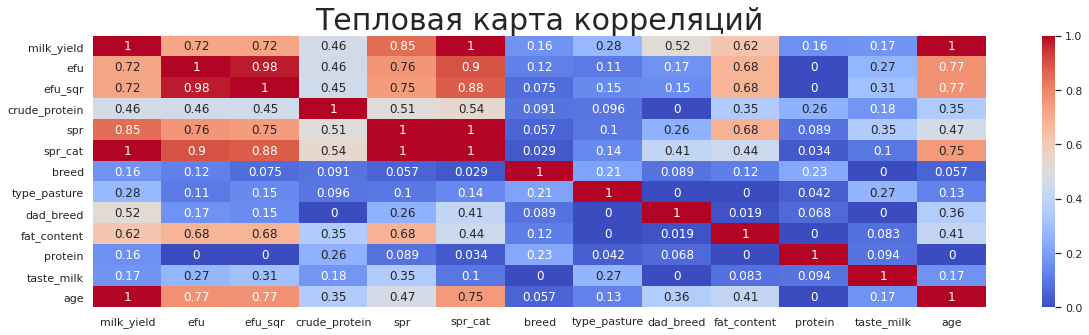

In [ ]:
plt.figure(figsize=(20, 5))

sns.heatmap(modified_ferma_main[['milk_yield', 'efu', 'efu_sqr', 'crude_protein', 'spr', 'spr_cat', 'breed', 'type_pasture',
                        'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
                      ].phik_matrix(interval_cols = ['milk_yield', 'efu', 'efu_sqr', 'crude_protein', 'spr', 'fat_content', 'protein'],
                                    bins = {'milk_yield':10,
                                            'efu':10,
                                            'efu_sqr':10,
                                            'crude_protein':10,
                                            'spr':5,
                                            'fat_content':5,
                                            'protein':5}) ,
            annot=True,
            cmap='coolwarm')

plt.title('Тепловая карта корреляций', fontsize=30)
plt.show()

Видим, что удой практически не зависит от породы и вкуса, уберем эти признаки. Но, не смотря на низкую зависимость, процент белка оставим в выборке, так как это одна из составляющих молока.  
ЭКЕ удалим оставив его версию в кватрате, так как из корреляция с целевым признаком равна. А СПО оствим и категорианальном и количественном виде, так как корреляция с моделью этих признаков разная и модель точнее обучится на данных этих признаков в совокупности.

In [ ]:
second_model = model(modified_ferma_main,
                    ['type_pasture', 'dad_breed', 'age', 'spr_cat'],
                    ['efu_sqr', 'crude_protein', 'spr'])

Обучим вторую модель

In [ ]:
second_model_lr=LinearRegression()
second_model_lr.fit(second_model['X_train'], second_model['y_train'])
predictions_two = second_model_lr.predict(second_model['X_test'])

Проанализируем остатки

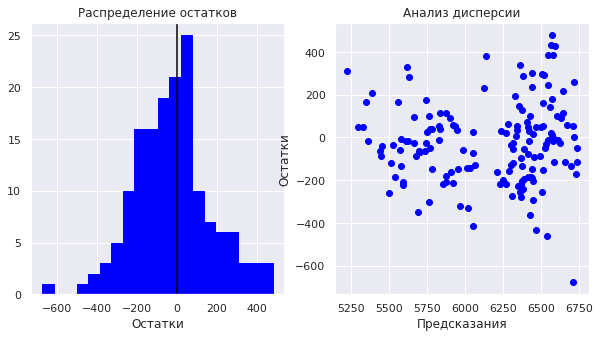

In [ ]:
residue_analysis(second_model['y_test'], predictions_two)

In [ ]:
model_quality_assessments(second_model['y_test'], predictions_two)

R2 = 0.8178
RMSE = 192.59
MSE = 37089.25
MAE = 149.13


**Распределение остатков**  
Распределение остатков второй модели симметричнее, максимум прогонозов находится в ноле, заниженных прогнознов (отклонение -200) меньше, чем в первой модели ошибок.  

**Анализ дисперсии**  
На диаграмме рассеяния видим возросшую стабильность в дисперсии между значениями, в сравнении с первой моделью.  
  
**Анализ метрик**  
Коэфициент детерминации R² говорит о том, что с точностью 81.78%  случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Что говорит о увеличении эффективности модели более чем на 2%.  
  RMSE так же остается лучшей метрикой для оценки, которая теперь равна 193 кг, а это увеличение точности на более чем 6%.

### Третья модель

Добавим к уже измененным данным имена пап быков.

In [ ]:
modified_ferma_main_final = modified_ferma_main.merge(ferma_dad, on='id', how = 'left')
modified_ferma_main_final.head(10)

,id,milk_yield,efu,crude_protein,spr,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age,efu_sqr,spr_cat,dad_name
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,201.64,< 0.91,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,163.84,< 0.91,соловчик
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,196.00,< 0.91,барин
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,< 0.91,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,163.84,< 0.91,барин
5,6,5254,12.7,1806,0.885,рефлешн соверинг,холмистое,соверин,3.13,3.078,вкусно,менее_2_лет,161.29,< 0.91,барин
6,7,5910,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,вкусно,более_2_лет,174.24,< 0.91,соловчик
7,8,6179,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,вкусно,более_2_лет,216.09,> 0.91,геркулес
8,9,6783,14.2,1918,0.940,рефлешн соверинг,холмистое,айдиал,3.71,3.077,вкусно,более_2_лет,201.64,> 0.91,буйный
9,10,5339,13.4,1791,0.895,вис бик айдиал,холмистое,соверин,3.13,3.075,вкусно,менее_2_лет,179.56,< 0.91,барин


In [ ]:
third_model = model(modified_ferma_main_final,
                    ['type_pasture', 'dad_breed', 'age', 'spr_cat', 'dad_name'],
                    ['efu_sqr', 'crude_protein', 'spr'])

Обучим третью модель

In [ ]:
third_model_lr=LinearRegression()
third_model_lr.fit(third_model['X_train'], third_model['y_train'])
predictions_three = third_model_lr.predict(third_model['X_test'])

Проанализируем остатки

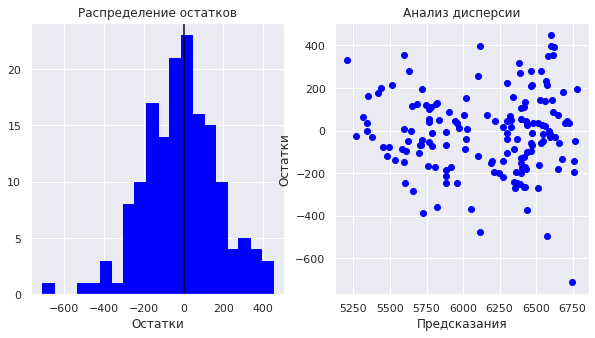

In [ ]:
residue_analysis(third_model['y_test'], predictions_three)

Оценим качество модели, расчитав метрики

In [ ]:
model_quality_assessments(third_model['y_test'], predictions_three)

R2 = 0.8235
RMSE = 189.54
MSE = 35925.05
MAE = 146.74


**Распределение остатков** стало близким к нормальному без сильных смещений.   
  
**Дисперсия** практически не отличается от второй модели.  
  
**Анализ метрик**  
Коэфициент детерминации R² говорит о том, что с точностью 82.35%  случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Что говорит о увеличении эффективности модели на ещё на 0.5%, в сравнении с предыдущей.  
  RMSE так же остается лучшей метрикой для оценки, которая теперь равна 190 кг.  
    
Итоговые результаты оценки для третьей модели говорят о том, что следует использовать именно её, как наиболее эффективную.

### Прогноз удоя

Определим доверительный интервал

In [ ]:
errors = third_model['y_test'] - predictions_three

alpha = 0.05

lower = np.quantile(errors, alpha/2)
upper = np.quantile(errors, 1 - alpha/2)

# Границы доверительного интервала
#ci_lower = third_model_lr.predict(third_model['X_test']) + lower
#ci_upper = third_model_lr.predict(third_model['X_test']) + upper

print(f'Доверительный интервал от {lower:.2f} до {upper:.2f}')

Доверительный интервал от -374.91 до 356.96


Для того чтобы спрогнозировать удой необходимо в датафрейм с коровами к покупке добавить недостающие ЭКЕ, СПО и Сырой протеин, для этого возьмем их средние значения из основной таблицы ferma_main.

In [ ]:
display(ferma_main.info())
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             628 non-null    int64  
 1   milk_yield     628 non-null    int64  
 2   efu            628 non-null    float64
 3   crude_protein  628 non-null    int64  
 4   spr            628 non-null    float64
 5   breed          628 non-null    object 
 6   type_pasture   628 non-null    object 
 7   dad_breed      628 non-null    object 
 8   fat_content    628 non-null    float64
 9   protein        628 non-null    float64
 10  taste_milk     628 non-null    object 
 11  age            628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 79.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   type_pasture  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_content   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Так же увеличим количественные признаки на 5%

In [ ]:
modified_cow_buy = cow_buy.copy()
modified_cow_buy.insert(7, column='efu_sqr', value=(ferma_main['efu'].mean() * 1.05) ** 2)
modified_cow_buy.insert(8, column='crude_protein', value=ferma_main['crude_protein'].mean() * 1.05)
modified_cow_buy.insert(9, column='spr', value=ferma_main['spr'].mean() * 1.05)
modified_cow_buy.insert(10, column='spr_cat', value=('> 0.91'))

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

Все так, но округлять то зачем?

In [ ]:
display(modified_cow_buy.info())
modified_cow_buy.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   breed          20 non-null     object 
 1   type_pasture   20 non-null     object 
 2   dad_breed      20 non-null     object 
 3   dad_name       20 non-null     object 
 4   fat_content    20 non-null     float64
 5   protein        20 non-null     float64
 6   age            20 non-null     object 
 7   efu_sqr        20 non-null     float64
 8   crude_protein  20 non-null     float64
 9   spr            20 non-null     float64
 10  spr_cat        20 non-null     object 
dtypes: float64(5), object(6)
memory usage: 1.8+ KB


None

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu_sqr,crude_protein,spr,spr_cat
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,0.958744,> 0.91
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,0.958744,> 0.91
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,0.958744,> 0.91
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,0.958744,> 0.91


Сделаем прогноз удоя

In [ ]:
cat_col_names = ['type_pasture', 'dad_breed', 'age', 'spr_cat', 'dad_name']
num_col_names = ['efu_sqr', 'crude_protein', 'spr']


cow_buy_scaled = third_model['scaler'].transform(modified_cow_buy[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns = num_col_names)

cow_buy_ohe = third_model['encoder'].transform(modified_cow_buy[cat_col_names])
encoder_col_names = third_model['encoder'].get_feature_names()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns = encoder_col_names)

cow_buy_test = pd.concat([cow_buy_scaled, cow_buy_ohe], axis = 1)

predictions = third_model_lr.predict(cow_buy_test).round(2)


prognose_milk_yield = pd.Series(predictions).to_frame(name='prognose_milk_yield')
display(prognose_milk_yield)

,prognose_milk_yield
0,5952.17
1,6379.48
2,5888.17
3,6060.94
4,5743.74
5,6270.71
6,5952.17
7,6047.33
8,5888.17
9,6393.08


Фермер определил нижнюю границу 6000 кг в год, чтобы снизить максимально риски при покупке, применим значения доверительного интервала к этой границе и заполним таблицу соответствующими рекомендациями для коров покупке.

In [ ]:
prognose_milk_yield['recommendation'] = prognose_milk_yield['prognose_milk_yield']\
                                         .apply(lambda x: 'покупать' if 6000 + abs(lower) <= x else 'не покупать')
prognose_milk_yield

,prognose_milk_yield,recommendation
0,5952.17,не покупать
1,6379.48,покупать
2,5888.17,не покупать
3,6060.94,не покупать
4,5743.74,не покупать
5,6270.71,не покупать
6,5952.17,не покупать
7,6047.33,не покупать
8,5888.17,не покупать
9,6393.08,покупать


<h3>Вывод:</h3> Обучив 3 модели, провели исследование метрик и анализ остатков, благодаря чему выбрали одну наиболее точную модель. С помощью выбранной модели спрогнозировали удой среди коров к покупке, который показал, что из 20 коров к покупке по критерию удоя и согласно доверитального интервала подходят 3.

## 6. Обучение модели логистической регрессии

Прежде чем обучать модель выделим нужные нам признаки. Обратившись к пункту 4 из тепловой карты видим, что вкус молока имеет довольно низкую корреляцию со всеми признаками, два (порода и порода отца) и вовсе имеют нулевое значение исключим их из тренировочной выборки.  

In [ ]:
cat_col_names = ['type_pasture', 'breed', 'dad_breed', 'age', 'spr_cat']
num_col_names = ['efu_sqr', 'crude_protein', 'fat_content', 'protein', 'spr']


RANDOM_STATE = 42

X = modified_ferma_main_final.drop(columns='taste_milk', axis = 2)
y = modified_ferma_main_final['taste_milk']

# приводим признак к бинарному виду
y = np.where(y == 'вкусно', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)


# приводим значения всех признаков к единой шкале
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop = 'first', sparse = False)

# обучими трансформируем категориальные признаки из тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
#инициализация модели
clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Рассчитаем матрицу ошибок

Text(39.5, 0.5, 'True')

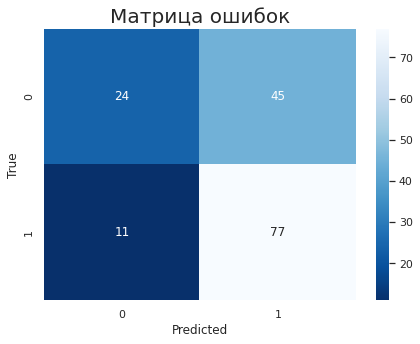

In [ ]:
plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=20)
plt.xlabel('Predicted');
plt.ylabel('True')

**Старые данные**  
77 раз модель предсказывает, что молоко "вкусное" (True Positive)  
25 раз, что молоко "не вкусное" (True Negative)  
11 раз назвала "невкусное" "вкусным" (False Positive)  
44 раз назвала "вкусное" "невкусным" (False Negative)  
  
**Новые данные**  
77 раз модель предсказывает, что молоко "вкусное" (True Positive)  
24 раза, что молоко "не вкусное" (True Negative)  
11 раз назвала "невкусное" "вкусным" (False Positive)  
45 раз назвала "вкусное" "невкусным" (False Negative)

Рассчитаем метрики

In [ ]:
print('accuracy = ', accuracy_score(y_pred, y_test).round(2))
print('recall = ', recall_score(y_test, y_pred).round(2))
print('precision =', precision_score(y_test, y_pred).round(2))

accuracy =  0.64
recall =  0.88
precision = 0.63


Видим что у модели имеется 11 ошибок первого рода (False Positive), эта ошибка является критической, так как получить невкусное молоко под видом вкусного намного неприятнее, чем наоборот. В связи с этим, метрика presicion должа быть увеличена, даже во вред другим метрикам. Для этого необходимо произвести настройку порога.

Сперва оценим вероятность прогнозов.

In [ ]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head(5)

,y_valid,y_proba
17,1,0.838787
114,1,0.829002
85,1,0.816605
8,1,0.812956
136,1,0.810760


Разобьем интервал на 50 порогов

In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 50,endpoint=False)]

Добавим столбцы с предсказаниями для разных пороговых значений вероятности

In [ ]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

С помощью цикла найдем порог вероятности, при котором модель не допускает ошибки False Positive

In [ ]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        threshold = i
        print('Порог = ',i)
        break

Порог =  0.82


Преобразуем вероятности в классы, согласно найденого порога

In [ ]:
y_pred = np.where(clf.predict_proba(X_test)[:,1] > threshold , 1, 0)

Снова выведем матрицу ошибок и метрики

accuracy =  0.45
recall =  0.02
precision = 1.0


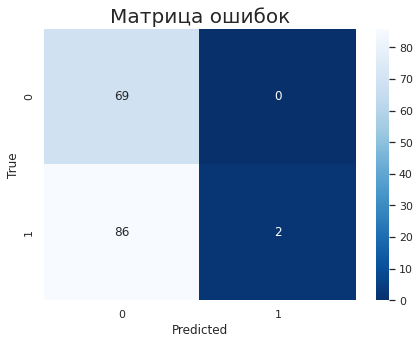

In [ ]:
plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=20)
plt.xlabel('Predicted');
plt.ylabel('True')

print('accuracy = ', accuracy_score(y_pred, y_test).round(2))
print('recall = ', recall_score(y_test, y_pred).round(2))
print('precision =', precision_score(y_test, y_pred).round(2))

Снизим порог на 5% и пересчитаем метрики и матрицу ошибок

accuracy =  0.55
recall =  0.19
precision = 1.0


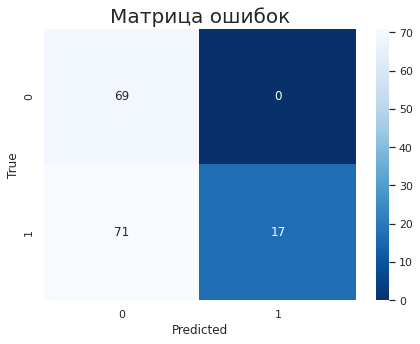

In [ ]:
reduced_threshold = threshold - threshold * 0.05
y_pred = np.where(clf.predict_proba(X_test)[:,1] > reduced_threshold, 1, 0)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=20)
plt.xlabel('Predicted');
plt.ylabel('True')

print('accuracy = ', accuracy_score(y_pred, y_test).round(2))
print('recall = ', recall_score(y_test, y_pred).round(2))
print('precision =', precision_score(y_test, y_pred).round(2))

Видим что ошибок первого рода по прежнему 0, но при этом число предсказаний True Positive возросло до 17. Снизим порог ещё на 2.5%

accuracy =  0.61
recall =  0.32
precision = 0.97


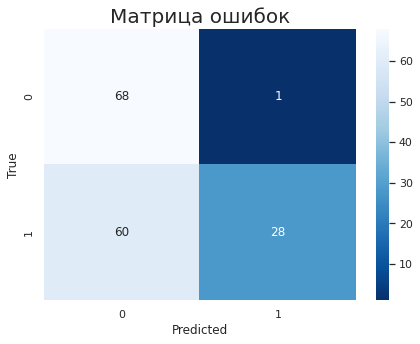

In [ ]:
reduced_threshold_two = reduced_threshold - reduced_threshold * 0.025
y_pred = np.where(clf.predict_proba(X_test)[:,1] > reduced_threshold_two, 1, 0)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=20)
plt.xlabel('Predicted');
plt.ylabel('True')

print('accuracy = ', accuracy_score(y_pred, y_test).round(2))
print('recall = ', recall_score(y_test, y_pred).round(2))
print('precision =', precision_score(y_test, y_pred).round(2))

Видим что появилась 1 ошибка первого рода, но при этом число предсказаний True Positive возросло до 28. Примем этот порог за искомый.

In [ ]:
reduced_threshold_two

0.7595249999999999

In [ ]:

cow_buy_ohe = encoder.transform(modified_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns = encoder_col_names)

cow_buy_scaled = scaler.transform(modified_cow_buy[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns = num_col_names)

cow_buy_test = pd.concat([cow_buy_scaled, cow_buy_ohe], axis = 1)

# y_pred = clf.predict_proba(X_cow)[:,1]
y_pred = clf.predict_proba(cow_buy_test)[:,1]

cow_buy['taste_milk'] = y_pred

cow_buy['taste_milk'] = cow_buy['taste_milk'].apply(lambda x: 'вкусно' if x >= reduced_threshold_two else 'не вкусно')

cow_buy

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,taste_milk
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,не вкусно
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,не вкусно
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,вкусно
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,не вкусно
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,вкусно
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,не вкусно
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,не вкусно
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,не вкусно
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,не вкусно


Исходя из полученных даных имеем прогноз в котором лишь 7 коров с высокой степенью уыерености дают вкусное молоко.

In [ ]:
cow_buy['milk_yield'] = prognose_milk_yield['prognose_milk_yield']
cow_buy['recommendation'] = prognose_milk_yield['recommendation']
cow_buy['recommendation'] = cow_buy.apply(
            lambda row: 'покупать' if row['taste_milk'] == 'вкусно' and row['recommendation'] == 'покупать' else 'не покупать',
            axis=1
            )

## 7. Итоговые выводы

В ходе выполнения работы были исследованы данные о коровах фермера, именах быков отцов и коровах для покупки.  
  
**Выполнили предобработку данных:**  
- Названия столбцов датафреймов приведены к "змеиному регистру".  
- В ferma_main и ferma_dad были обнаружены полные и неявные дубликаты. Неявные дубликаты были исправлены;
- Типы данных в датафреймах приведены в соответствие.  
  
**Произвели исследовательский анализ:**  
  
  Данные основного датафрейма показали следующее:  
  - Имелся выброс с аномально высоким значением. Удалили строку с этим выбросом. Удои распределены нормально. Медианный удой 6132.5 кг в год.
  - График ЭКЕ смещен в право, медианное значение 14.7.
  - СПО распределенно довольно неравномерно на 2 части с высоким соотношением больше 0.92 и низким меньше этого значения. Медианное значение при этом 0.93
  - График жирности сильно смещен вправо, что говорит о высокой жирности молока. Медианное значение при этом 3.65%. Имеются выбросы слева.
  - Содержание белка в молоке распределено нормально, медианное значение 3.076.
  - Порода вис бик айдиал преобладает в хозяйстве.
  - Холмистые пастбища преобладают в хозяйстве.
  - Породы отцов распределены в равных долях.
  - Молоко с оценкой "вкусно" преобладет (58,9%), хоть и не колоссально.
  - Коров старше 2 лет подавляющее большинство.  
  
Выяснили, что в хозяйстве преобладают коровы старше 2 лет, дающие зачастую вкусное молоко с высокой жирностью и неплохим содержанием белка, около 6000 кг в год.  
  
Данные датафрейма быков пап показали следующее:  
  
Наиболее плодовитыми являются быки по кличке Буйный и Барин с приблизительно равными долями, в 34.2% и 38.2%.  
  
Данные датафрейма коров к покупке показали:  
  - Схожую ситуацию с коровами в хозяйстве с медианной жирностью 3.59%
  - Наблюдаем смещение графика вправо, что говорит о преобладании среднего белка в молоке у коров для покупки. Медианное значение при этом схожее 3.074.
  - Породы коров к покупке как и типы пастбищ, здесь имеют противоположные доли нежели в хозяйстве.
  - Так же и с продами пап быков иная ситуация: Буйный и Геркулес занимают большую долю.
  - С возрастом коров, ситуация аналогична той, что в хозяйстве.  
  
Выяснили, что среди коров к покупке так же большинство старше 2 лет, имеют схожие показатели по жирности и содержанию белка, но при этом чаще пасутся они на равнинах и преобладающая порода здесь рефлешн соверинг.  
  
**Выполнили корреляционный анализ, который показал следующее:**  
  
- ЭКЕ обладает нелинейной зависимостью с удоем, так как линия вокруг которой собраны точки кривая. Для усиления степени связи ЭКЕ придется возвести в квадрат.
- У коров младше 2 лет практически не бывает высокого СПО.  
- СПО при удоях менее 6000 ниже 0.91, значит можно разбить этот признак на категориальный: "менее 0.91" и "более 0.91".  
- Жирность у высокопроизводительных коров (свыше 6000 кг в год) более 3.6 %.
- Коровы порода отца у которых айдиал, чаще имеют болшие показатели удоя.
- Немногие самые высокие показатели удоя (свыше 7000 кг в год) приходят с холмистых пастбищ.
- Линейной зависимости между показателем содержания белка и годового удоя нет.  


**Обучили 3 модели линейной регресии**  
  В ходе чего для выявления лучшей модели выполнили соедующие этапы:  
  - Заменили показатель ЭКЕ на ЭКЕ в квадрате для усиления связи с целевым признаком.
  - Добавили категорианальный показатель СПО (spr_cat), так как значение 0.91 делит значения целевого показателя на 2 части.
  - Добавили признак имени папы из таблицы с коровами на продажу.  
  - Убрали признак породы, чтобы снизить влияние на прогнозируемые значения, так как у этого признака практически отсутствовала корреляция с целевым признаком.  
  

С помощью лучшей модели спрогнозировали удой среди коров к покупке, который показал, что из 20 коров к покупке по критерию удоя более 6000 кг в год и не превышающих доверительного интервала подходят 7 коров.   

**Обучили модель логистической регресии**  
  Для улучшения этой модели вычислили и установили порог классификации 0.81 при котором метрика precision стала равна 1, что так же свело False Positive ошибки к нулю.
  С помощью этой модели спрогнозировали вкусовые качества молока у коров к покупке и получили, что 5 коров с высокой степенью уверености дают вкусное молоко.

На основе полученных данных с двух моделей можем получить следующий датафрейм с рекомендациями:

In [ ]:
cow_buy

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,taste_milk,milk_yield,recommendation
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,не вкусно,5952.17,не покупать
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,не вкусно,6379.48,не покупать
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,не вкусно,5888.17,не покупать
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,вкусно,6060.94,не покупать
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,не вкусно,5743.74,не покупать
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,вкусно,6270.71,не покупать
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,не вкусно,5952.17,не покупать
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,не вкусно,6047.33,не покупать
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,не вкусно,5888.17,не покупать
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,не вкусно,6393.08,не покупать


Из него мы можем выделить 3 коровы которые можем рекомендовать фермеру к покупке, а именно:

In [ ]:
cow_buy[cow_buy['recommendation'] == 'покупать']

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,taste_milk,milk_yield,recommendation


#### Рекомендации  
  
Можно рекомендовать получить данные о показателях СПО, ЭКЕ и сырого протеина, что может повлять на конечный результат и повысить качество как модели линейной регресии (т.е. точнее предсказать удой), так и логистической регресии (т.е. точнее предсказать вкус молока)  
  
Так же можно собрать больше информации по аналогичным коровам, чье молоко удовлетворяет критерию "вкусно". К примеру, с соседних ферм, тем самым увеличив размер выборки, что положительно скажется на качестве модели логистической регрессии.


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Это была достаточно объемная работа, требующая нахождения в контексте задачи, применения большого объема теоретических знаний.

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Внимательная предобработка и подготовка признаков.
* Хорошие решения по коду
    
**На что стоит обратить внимание🤔**
    
* Важно использовать только корректный подход для замера корреляции. Давай оставлять только phik
* Нужно перепроверить по признакам для моделей.
* Стоит избегать дублирования обучения на этапе предсказания моделью.
* Важно уточнить по порогу и метрикам качества.
* Эти и остальные замечания я также написал по ходу проекта.


Если какие-то моменты в проекте будут не ясны, смело задавай вопросы. Прошу тебя только оформлять их в комментариях на цветном фоне, чтобы я их точно не пропустил.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>
  
    


####